In [136]:
import pandas as pd
import numpy as np
from itertools import cycle, islice
import math

In [98]:
data = pd.read_csv("/Users/deepikamulchandani/Downloads/DataforLR.csv")

In [99]:
data

,worklength,starttime,logonperday,devperday,urlperday,emailperday,worklength_out,starttime_out,logon_out,device_out,...,sentiment_perpos_out,sentiment_perneg,sentiment_perneg_out,supervisor,psyO,psyC,psyE,psyA,psyN,Y
0,427.026012,476.820809,1.774566,0.000000,398.843931,34.780347,110,78,0,0,...,0.037572,0.187108,0.046243,,21,44,24,45,19,stay
1,424.043353,478.170520,1.000000,0.000000,113.670520,10.488439,144,139,0,0,...,0.046243,0.186203,0.031792,MSS0001,49,35,23,10,27,stay
2,542.921965,508.424855,1.000000,2.910405,285.000000,26.291908,127,132,0,131,...,0.054913,0.179348,0.037572,MSS0001,35,28,14,15,30,stay
3,545.601156,477.277457,1.000000,0.000000,285.000000,26.002890,120,102,0,0,...,0.034682,0.203546,0.037572,MSS0001,23,38,39,20,27,stay
4,447.520231,447.034682,1.346821,0.000000,285.000000,25.867052,65,131,120,0,...,0.034682,0.194808,0.026012,MSS0001,33,39,18,18,27,stay
5,417.988439,521.713873,1.820809,0.000000,285.000000,25.994220,14,117,11,0,...,0.043353,0.127253,0.031792,MSS0001,43,43,37,20,41,stay
6,543.303468,417.514451,1.771676,0.000000,285.000000,26.346821,2,106,1,0,...,0.040462,0.201064,0.017341,MSS0001,37,38,41,20,36,stay
7,469.413295,419.329480,2.118497,0.000000,300.000000,26.430636,47,160,59,0,...,0.040462,0.210169,0.023121,MSS0001,23,18,40,11,34,stay
8,542.774566,508.754335,1.000000,0.000000,114.000000,10.618497,133,132,0,0,...,0.040462,0.179491,0.052023,HCS0003,44,28,44,38,23,stay
9,601.985549,479.202312,1.000000,0.000000,190.000000,17.508671,152,147,0,0,...,0.028902,0.229902,0.020231,HCS0003,46,24,30,35,34,stay


In [100]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score


In [101]:
data['y']=0

In [102]:
def calc_resp():
    for row in data.itertuples():
        if(row[30]=='left'):
            data.set_value(row.Index,'y',1)

calc_resp()

In [103]:
data

,worklength,starttime,logonperday,devperday,urlperday,emailperday,worklength_out,starttime_out,logon_out,device_out,...,sentiment_perneg,sentiment_perneg_out,supervisor,psyO,psyC,psyE,psyA,psyN,Y,y
0,427.026012,476.820809,1.774566,0.000000,398.843931,34.780347,110,78,0,0,...,0.187108,0.046243,,21,44,24,45,19,stay,0
1,424.043353,478.170520,1.000000,0.000000,113.670520,10.488439,144,139,0,0,...,0.186203,0.031792,MSS0001,49,35,23,10,27,stay,0
2,542.921965,508.424855,1.000000,2.910405,285.000000,26.291908,127,132,0,131,...,0.179348,0.037572,MSS0001,35,28,14,15,30,stay,0
3,545.601156,477.277457,1.000000,0.000000,285.000000,26.002890,120,102,0,0,...,0.203546,0.037572,MSS0001,23,38,39,20,27,stay,0
4,447.520231,447.034682,1.346821,0.000000,285.000000,25.867052,65,131,120,0,...,0.194808,0.026012,MSS0001,33,39,18,18,27,stay,0
5,417.988439,521.713873,1.820809,0.000000,285.000000,25.994220,14,117,11,0,...,0.127253,0.031792,MSS0001,43,43,37,20,41,stay,0
6,543.303468,417.514451,1.771676,0.000000,285.000000,26.346821,2,106,1,0,...,0.201064,0.017341,MSS0001,37,38,41,20,36,stay,0
7,469.413295,419.329480,2.118497,0.000000,300.000000,26.430636,47,160,59,0,...,0.210169,0.023121,MSS0001,23,18,40,11,34,stay,0
8,542.774566,508.754335,1.000000,0.000000,114.000000,10.618497,133,132,0,0,...,0.179491,0.052023,HCS0003,44,28,44,38,23,stay,0
9,601.985549,479.202312,1.000000,0.000000,190.000000,17.508671,152,147,0,0,...,0.229902,0.020231,HCS0003,46,24,30,35,34,stay,0


In [104]:
X = pd.DataFrame.copy(data)

In [105]:
X

,worklength,starttime,logonperday,devperday,urlperday,emailperday,worklength_out,starttime_out,logon_out,device_out,...,sentiment_perneg,sentiment_perneg_out,supervisor,psyO,psyC,psyE,psyA,psyN,Y,y
0,427.026012,476.820809,1.774566,0.000000,398.843931,34.780347,110,78,0,0,...,0.187108,0.046243,,21,44,24,45,19,stay,0
1,424.043353,478.170520,1.000000,0.000000,113.670520,10.488439,144,139,0,0,...,0.186203,0.031792,MSS0001,49,35,23,10,27,stay,0
2,542.921965,508.424855,1.000000,2.910405,285.000000,26.291908,127,132,0,131,...,0.179348,0.037572,MSS0001,35,28,14,15,30,stay,0
3,545.601156,477.277457,1.000000,0.000000,285.000000,26.002890,120,102,0,0,...,0.203546,0.037572,MSS0001,23,38,39,20,27,stay,0
4,447.520231,447.034682,1.346821,0.000000,285.000000,25.867052,65,131,120,0,...,0.194808,0.026012,MSS0001,33,39,18,18,27,stay,0
5,417.988439,521.713873,1.820809,0.000000,285.000000,25.994220,14,117,11,0,...,0.127253,0.031792,MSS0001,43,43,37,20,41,stay,0
6,543.303468,417.514451,1.771676,0.000000,285.000000,26.346821,2,106,1,0,...,0.201064,0.017341,MSS0001,37,38,41,20,36,stay,0
7,469.413295,419.329480,2.118497,0.000000,300.000000,26.430636,47,160,59,0,...,0.210169,0.023121,MSS0001,23,18,40,11,34,stay,0
8,542.774566,508.754335,1.000000,0.000000,114.000000,10.618497,133,132,0,0,...,0.179491,0.052023,HCS0003,44,28,44,38,23,stay,0
9,601.985549,479.202312,1.000000,0.000000,190.000000,17.508671,152,147,0,0,...,0.229902,0.020231,HCS0003,46,24,30,35,34,stay,0


In [106]:
del X['Y']

In [107]:
X

,worklength,starttime,logonperday,devperday,urlperday,emailperday,worklength_out,starttime_out,logon_out,device_out,...,sentiment_perpos_out,sentiment_perneg,sentiment_perneg_out,supervisor,psyO,psyC,psyE,psyA,psyN,y
0,427.026012,476.820809,1.774566,0.000000,398.843931,34.780347,110,78,0,0,...,0.037572,0.187108,0.046243,,21,44,24,45,19,0
1,424.043353,478.170520,1.000000,0.000000,113.670520,10.488439,144,139,0,0,...,0.046243,0.186203,0.031792,MSS0001,49,35,23,10,27,0
2,542.921965,508.424855,1.000000,2.910405,285.000000,26.291908,127,132,0,131,...,0.054913,0.179348,0.037572,MSS0001,35,28,14,15,30,0
3,545.601156,477.277457,1.000000,0.000000,285.000000,26.002890,120,102,0,0,...,0.034682,0.203546,0.037572,MSS0001,23,38,39,20,27,0
4,447.520231,447.034682,1.346821,0.000000,285.000000,25.867052,65,131,120,0,...,0.034682,0.194808,0.026012,MSS0001,33,39,18,18,27,0
5,417.988439,521.713873,1.820809,0.000000,285.000000,25.994220,14,117,11,0,...,0.043353,0.127253,0.031792,MSS0001,43,43,37,20,41,0
6,543.303468,417.514451,1.771676,0.000000,285.000000,26.346821,2,106,1,0,...,0.040462,0.201064,0.017341,MSS0001,37,38,41,20,36,0
7,469.413295,419.329480,2.118497,0.000000,300.000000,26.430636,47,160,59,0,...,0.040462,0.210169,0.023121,MSS0001,23,18,40,11,34,0
8,542.774566,508.754335,1.000000,0.000000,114.000000,10.618497,133,132,0,0,...,0.040462,0.179491,0.052023,HCS0003,44,28,44,38,23,0
9,601.985549,479.202312,1.000000,0.000000,190.000000,17.508671,152,147,0,0,...,0.028902,0.229902,0.020231,HCS0003,46,24,30,35,34,0


In [108]:
del X['y']

In [109]:
X

,worklength,starttime,logonperday,devperday,urlperday,emailperday,worklength_out,starttime_out,logon_out,device_out,...,sentiment_perpos,sentiment_perpos_out,sentiment_perneg,sentiment_perneg_out,supervisor,psyO,psyC,psyE,psyA,psyN
0,427.026012,476.820809,1.774566,0.000000,398.843931,34.780347,110,78,0,0,...,0.423424,0.037572,0.187108,0.046243,,21,44,24,45,19
1,424.043353,478.170520,1.000000,0.000000,113.670520,10.488439,144,139,0,0,...,0.479262,0.046243,0.186203,0.031792,MSS0001,49,35,23,10,27
2,542.921965,508.424855,1.000000,2.910405,285.000000,26.291908,127,132,0,131,...,0.437882,0.054913,0.179348,0.037572,MSS0001,35,28,14,15,30
3,545.601156,477.277457,1.000000,0.000000,285.000000,26.002890,120,102,0,0,...,0.447057,0.034682,0.203546,0.037572,MSS0001,23,38,39,20,27
4,447.520231,447.034682,1.346821,0.000000,285.000000,25.867052,65,131,120,0,...,0.433637,0.034682,0.194808,0.026012,MSS0001,33,39,18,18,27
5,417.988439,521.713873,1.820809,0.000000,285.000000,25.994220,14,117,11,0,...,0.520479,0.043353,0.127253,0.031792,MSS0001,43,43,37,20,41
6,543.303468,417.514451,1.771676,0.000000,285.000000,26.346821,2,106,1,0,...,0.453589,0.040462,0.201064,0.017341,MSS0001,37,38,41,20,36
7,469.413295,419.329480,2.118497,0.000000,300.000000,26.430636,47,160,59,0,...,0.408623,0.040462,0.210169,0.023121,MSS0001,23,18,40,11,34
8,542.774566,508.754335,1.000000,0.000000,114.000000,10.618497,133,132,0,0,...,0.419905,0.040462,0.179491,0.052023,HCS0003,44,28,44,38,23
9,601.985549,479.202312,1.000000,0.000000,190.000000,17.508671,152,147,0,0,...,0.382750,0.028902,0.229902,0.020231,HCS0003,46,24,30,35,34


In [110]:
X[['NumericSupervisor']]=X[['supervisor']].stack().rank(method='dense').unstack()

In [111]:
X

,worklength,starttime,logonperday,devperday,urlperday,emailperday,worklength_out,starttime_out,logon_out,device_out,...,sentiment_perpos_out,sentiment_perneg,sentiment_perneg_out,supervisor,psyO,psyC,psyE,psyA,psyN,NumericSupervisor
0,427.026012,476.820809,1.774566,0.000000,398.843931,34.780347,110,78,0,0,...,0.037572,0.187108,0.046243,,21,44,24,45,19,1.0
1,424.043353,478.170520,1.000000,0.000000,113.670520,10.488439,144,139,0,0,...,0.046243,0.186203,0.031792,MSS0001,49,35,23,10,27,50.0
2,542.921965,508.424855,1.000000,2.910405,285.000000,26.291908,127,132,0,131,...,0.054913,0.179348,0.037572,MSS0001,35,28,14,15,30,50.0
3,545.601156,477.277457,1.000000,0.000000,285.000000,26.002890,120,102,0,0,...,0.034682,0.203546,0.037572,MSS0001,23,38,39,20,27,50.0
4,447.520231,447.034682,1.346821,0.000000,285.000000,25.867052,65,131,120,0,...,0.034682,0.194808,0.026012,MSS0001,33,39,18,18,27,50.0
5,417.988439,521.713873,1.820809,0.000000,285.000000,25.994220,14,117,11,0,...,0.043353,0.127253,0.031792,MSS0001,43,43,37,20,41,50.0
6,543.303468,417.514451,1.771676,0.000000,285.000000,26.346821,2,106,1,0,...,0.040462,0.201064,0.017341,MSS0001,37,38,41,20,36,50.0
7,469.413295,419.329480,2.118497,0.000000,300.000000,26.430636,47,160,59,0,...,0.040462,0.210169,0.023121,MSS0001,23,18,40,11,34,50.0
8,542.774566,508.754335,1.000000,0.000000,114.000000,10.618497,133,132,0,0,...,0.040462,0.179491,0.052023,HCS0003,44,28,44,38,23,33.0
9,601.985549,479.202312,1.000000,0.000000,190.000000,17.508671,152,147,0,0,...,0.028902,0.229902,0.020231,HCS0003,46,24,30,35,34,33.0


In [112]:
y = data['y']

In [113]:
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     1
25     0
26     0
27     0
28     0
29     0
      ..
970    0
971    0
972    0
973    0
974    0
975    0
976    0
977    1
978    0
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    1
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: y, Length: 1000, dtype: int64

In [114]:
del X['supervisor']

In [115]:
model = LogisticRegression()
model = model.fit(X, y)

In [116]:
model.score(X, y)

0.94299999999999995

In [117]:
y.mean()

0.155

In [118]:
var_imp=pd.DataFrame(zip(X.columns, np.transpose(model.coef_)),columns=['Variables', 'Importance'])

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
predicted = model2.predict(X_test)
print predicted

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 0]


In [121]:
probs = model2.predict_proba(X_test)
print probs

[[  9.85685372e-01   1.43146275e-02]
 [  8.76536401e-01   1.23463599e-01]
 [  8.96650058e-01   1.03349942e-01]
 [  9.90111747e-01   9.88825327e-03]
 [  9.62941661e-01   3.70583385e-02]
 [  9.55623872e-01   4.43761275e-02]
 [  8.48823073e-01   1.51176927e-01]
 [  9.99362243e-01   6.37756627e-04]
 [  9.82751328e-01   1.72486717e-02]
 [  9.69364299e-01   3.06357014e-02]
 [  9.58135237e-01   4.18647633e-02]
 [  9.39065365e-01   6.09346350e-02]
 [  9.97825460e-01   2.17453968e-03]
 [  9.48956719e-01   5.10432808e-02]
 [  8.67511797e-01   1.32488203e-01]
 [  9.91991750e-01   8.00825000e-03]
 [  8.23970094e-01   1.76029906e-01]
 [  9.30761582e-01   6.92384183e-02]
 [  8.73145699e-01   1.26854301e-01]
 [  9.91065456e-01   8.93454410e-03]
 [  9.97760992e-01   2.23900840e-03]
 [  9.25841535e-01   7.41584646e-02]
 [  8.99882874e-01   1.00117126e-01]
 [  7.52270669e-01   2.47729331e-01]
 [  9.63720877e-01   3.62791226e-02]
 [  8.86192288e-01   1.13807712e-01]
 [  2.34236874e-01   7.65763126e-01]
 

In [122]:
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])


0.953333333333
0.914869573406


In [123]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[258   1]
 [ 13  28]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97       259
          1       0.97      0.68      0.80        41

avg / total       0.95      0.95      0.95       300



In [124]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.91089109  0.92079208  0.93069307  0.92079208  0.93069307  0.97979798
  0.94949495  0.94949495  0.94949495  0.90909091]
0.935123512351


In [125]:
import matplotlib.pyplot as plt

In [126]:
var_imp['Importance']=var_imp['Importance'].astype(float)

In [31]:
#var_imp['Importance']= var_imp['Importance'].abs()

In [128]:
var_imp

,Variables,Importance
0,worklength,0.001138
1,starttime,-0.001394
2,logonperday,0.937938
3,devperday,-0.019069
4,urlperday,-0.019881
5,emailperday,0.269429
6,worklength_out,-0.009078
7,starttime_out,-0.017918
8,logon_out,-0.052030
9,device_out,-0.007197


In [129]:
var_imp['Importance']

0     0.001138
1    -0.001394
2     0.937938
3    -0.019069
4    -0.019881
5     0.269429
6    -0.009078
7    -0.017918
8    -0.052030
9    -0.007197
10    1.464436
11    0.393989
12   -0.163036
13    0.489235
14    0.490514
15    0.087432
16    0.523826
17   -0.033907
18   -0.022488
19    0.738166
20    0.008639
21   -0.276886
22   -0.184450
23   -0.007202
24   -0.012929
25    0.013257
26   -0.016987
27    0.041774
28   -0.002736
Name: Importance, dtype: float64

In [137]:
var_imp['Normalized_LR']=0.0
def sum_squared_normalization():
    val=0
    for row in var_imp.itertuples():
        val = val + row[2]*row[2]
    val2 = math.sqrt(val)
    for row in var_imp.itertuples():
        var_imp.set_value(row.Index, 'Normalized_LR', row[2]/val2)
        
sum_squared_normalization()

In [139]:
var_imp['Normalized_LR']= var_imp['Normalized_LR'].abs()
var_imp

,Variables,Importance,Normalized_LR
0,worklength,0.001138,0.000525
1,starttime,-0.001394,0.000643
2,logonperday,0.937938,0.432438
3,devperday,-0.019069,0.008792
4,urlperday,-0.019881,0.009166
5,emailperday,0.269429,0.124221
6,worklength_out,-0.009078,0.004185
7,starttime_out,-0.017918,0.008261
8,logon_out,-0.052030,0.023988
9,device_out,-0.007197,0.003318


In [33]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(var_imp)))
ax=var_imp.plot(kind='bar', title ="Variable Importance", figsize=(15, 10), legend=True, fontsize=12,color=my_colors)
ax.set_xlabel("Variables", fontsize=12)
ax.set_xticklabels(var_imp['Variables'])
ax.set_ylabel("Importance", fontsize=12)

In [140]:
var_imp3 = pd.read_csv("/Users/deepikamulchandani/Downloads/VariableImportance.csv")

In [141]:
var_imp3

,Unnamed: 0,Variables,Importance,Importance_RF,Importance_SVM
0,0,worklength,0.001035,0.03720,0.008500
1,1,starttime,0.001688,0.02000,0.004490
2,2,logonperday,0.945367,0.00000,0.422100
3,3,devperday,0.020309,0.03650,0.018520
4,4,urlperday,0.020091,0.00900,0.009230
5,5,emailperday,0.270957,0.00000,0.076690
6,6,worklength_out,0.009017,0.02860,0.005220
7,7,starttime_out,0.018158,0.05674,0.010120
8,8,logon_out,0.053031,0.00000,0.031120
9,9,device_out,0.007065,0.00000,0.003760


In [142]:
del var_imp3['Unnamed: 0']

In [145]:
var_imp4 = pd.DataFrame.copy(var_imp3)

In [146]:
var_imp4

,Variables,Importance,Importance_RF,Importance_SVM
0,worklength,0.001035,0.03720,0.008500
1,starttime,0.001688,0.02000,0.004490
2,logonperday,0.945367,0.00000,0.422100
3,devperday,0.020309,0.03650,0.018520
4,urlperday,0.020091,0.00900,0.009230
5,emailperday,0.270957,0.00000,0.076690
6,worklength_out,0.009017,0.02860,0.005220
7,starttime_out,0.018158,0.05674,0.010120
8,logon_out,0.053031,0.00000,0.031120
9,device_out,0.007065,0.00000,0.003760


In [147]:
#plt.show()

In [148]:
var_imp4['Importance'] = var_imp['Normalized_LR']

In [149]:
var_imp4

,Variables,Importance,Importance_RF,Importance_SVM
0,worklength,0.000525,0.03720,0.008500
1,starttime,0.000643,0.02000,0.004490
2,logonperday,0.432438,0.00000,0.422100
3,devperday,0.008792,0.03650,0.018520
4,urlperday,0.009166,0.00900,0.009230
5,emailperday,0.124221,0.00000,0.076690
6,worklength_out,0.004185,0.02860,0.005220
7,starttime_out,0.008261,0.05674,0.010120
8,logon_out,0.023988,0.00000,0.031120
9,device_out,0.003318,0.00000,0.003760


In [150]:
var_imp['Importance_SVM']=var_imp3['Importance_SVM']

In [151]:
var_imp

,Variables,Importance,Normalized_LR,Importance_SVM
0,worklength,0.001138,0.000525,0.008500
1,starttime,-0.001394,0.000643,0.004490
2,logonperday,0.937938,0.432438,0.422100
3,devperday,-0.019069,0.008792,0.018520
4,urlperday,-0.019881,0.009166,0.009230
5,emailperday,0.269429,0.124221,0.076690
6,worklength_out,-0.009078,0.004185,0.005220
7,starttime_out,-0.017918,0.008261,0.010120
8,logon_out,-0.052030,0.023988,0.031120
9,device_out,-0.007197,0.003318,0.003760


In [152]:
var_imp['Normalized_SVM']=0.0
def sum_squared_normalization():
    val=0
    for row in var_imp.itertuples():
        val = val + row[4]*row[4]
    val2 = math.sqrt(val)
    for row in var_imp.itertuples():
        var_imp.set_value(row.Index, 'Normalized_SVM', row[4]/val2)
        
sum_squared_normalization()

In [153]:
var_imp

,Variables,Importance,Normalized_LR,Importance_SVM,Normalized_SVM
0,worklength,0.001138,0.000525,0.008500,0.004803
1,starttime,-0.001394,0.000643,0.004490,0.002537
2,logonperday,0.937938,0.432438,0.422100,0.238510
3,devperday,-0.019069,0.008792,0.018520,0.010465
4,urlperday,-0.019881,0.009166,0.009230,0.005215
5,emailperday,0.269429,0.124221,0.076690,0.043334
6,worklength_out,-0.009078,0.004185,0.005220,0.002950
7,starttime_out,-0.017918,0.008261,0.010120,0.005718
8,logon_out,-0.052030,0.023988,0.031120,0.017585
9,device_out,-0.007197,0.003318,0.003760,0.002125


In [35]:
var_imp


,Variables,Importance
0,worklength,0.001035
1,starttime,0.001688
2,logonperday,0.945367
3,devperday,0.020309
4,urlperday,0.020091
5,emailperday,0.270957
6,worklength_out,0.009017
7,starttime_out,0.018158
8,logon_out,0.053031
9,device_out,0.007065


In [154]:
var_imp4['Importance_SVM']=var_imp['Normalized_SVM']

In [155]:
var_imp4

,Variables,Importance,Importance_RF,Importance_SVM
0,worklength,0.000525,0.03720,0.004803
1,starttime,0.000643,0.02000,0.002537
2,logonperday,0.432438,0.00000,0.238510
3,devperday,0.008792,0.03650,0.010465
4,urlperday,0.009166,0.00900,0.005215
5,emailperday,0.124221,0.00000,0.043334
6,worklength_out,0.004185,0.02860,0.002950
7,starttime_out,0.008261,0.05674,0.005718
8,logon_out,0.023988,0.00000,0.017585
9,device_out,0.003318,0.00000,0.002125


In [36]:
var_imp['Importance_RF']=0.0

In [85]:
var_imp.iloc[24,2]=0.0731

In [38]:
var_imp

,Variables,Importance,Importance_RF
0,worklength,0.001035,0.0000
1,starttime,0.001688,0.0000
2,logonperday,0.945367,0.0000
3,devperday,0.020309,0.0000
4,urlperday,0.020091,0.0000
5,emailperday,0.270957,0.0000
6,worklength_out,0.009017,0.0000
7,starttime_out,0.018158,0.0000
8,logon_out,0.053031,0.0000
9,device_out,0.007065,0.0000


In [39]:
var_imp['Importance_SVM']=0.0

In [67]:
var_imp.iloc[27,3]=0.00078

In [219]:
var_imp3

,Variables,Importance,Importance_RF,Importance_SVM
0,worklength,0.001035,0.03720,0.008500
1,starttime,0.001688,0.02000,0.004490
2,logonperday,0.945367,0.00000,0.422100
3,devperday,0.020309,0.03650,0.018520
4,urlperday,0.020091,0.00900,0.009230
5,emailperday,0.270957,0.00000,0.076690
6,worklength_out,0.009017,0.02860,0.005220
7,starttime_out,0.018158,0.05674,0.010120
8,logon_out,0.053031,0.00000,0.031120
9,device_out,0.007065,0.00000,0.003760


In [87]:
var_imp.to_csv("/Users/deepikamulchandani/Downloads/VariableImportance.csv")

In [174]:
var_imp2 = var_imp4[(var_imp4['Importance']>0.01)&(var_imp4['Importance_RF']>0.01)&(var_imp4['Importance_SVM']>0.01)]

In [175]:
var_imp2

,Variables,Importance,Importance_RF,Importance_SVM
10,device_susp,0.675181,0.5358,0.565056
11,url_out,0.181649,0.1311,0.117984
12,email_out,0.075168,0.4348,0.052245
14,email_tocomp,0.226152,0.0716,0.197600
15,email_topers,0.040311,0.0220,0.094133
21,sentiment_perneg,0.127659,0.0349,0.384464
22,sentiment_perneg_out,0.085041,0.0199,0.308515


In [209]:
var_imp2.iloc[6,0]='Email sentiment-negative outliers'

In [210]:
var_imp2

,Variables,Importance,Importance_RF,Importance_SVM
10,Suspicious device activity,0.675181,0.5358,0.565056
11,URL outliers,0.181649,0.1311,0.117984
12,Email outliers,0.075168,0.4348,0.052245
14,Email to DTAA address,0.226152,0.0716,0.197600
15,Email to personal address,0.040311,0.0220,0.094133
21,Email sentiment-negative,0.127659,0.0349,0.384464
22,Email sentiment-negative outliers,0.085041,0.0199,0.308515


In [245]:
var_imp2.iloc[6,0]='Email sentiment -ve outliers'

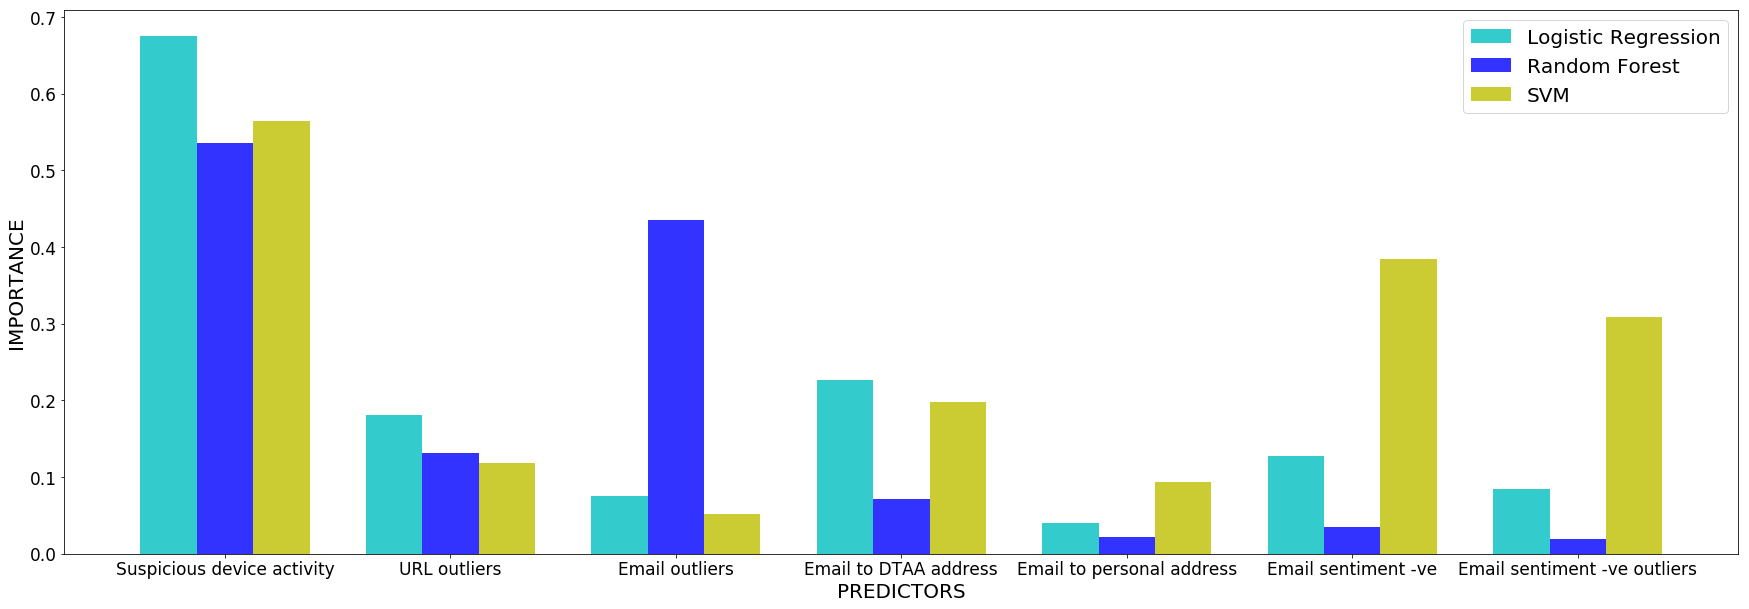

In [270]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 7
imp1 = var_imp2['Importance']
imp2 = var_imp2['Importance_RF']
imp3 = var_imp2['Importance_SVM']
 
# create plot
fig, ax = plt.subplots(figsize=(30,10))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index, imp1, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Logistic Regression',
                )
 
rects2 = plt.bar(index + bar_width, imp2, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Random Forest',
                )
 
rects3 = plt.bar(index + bar_width + bar_width, imp3, bar_width,
                 alpha=opacity,
                 color='y',
                 label='SVM',
                )

plt.xlabel('PREDICTORS',fontsize=20)
plt.ylabel('IMPORTANCE',fontsize=20)
plt.xticks(index + bar_width, var_imp2['Variables'], fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=20)

plt.show()

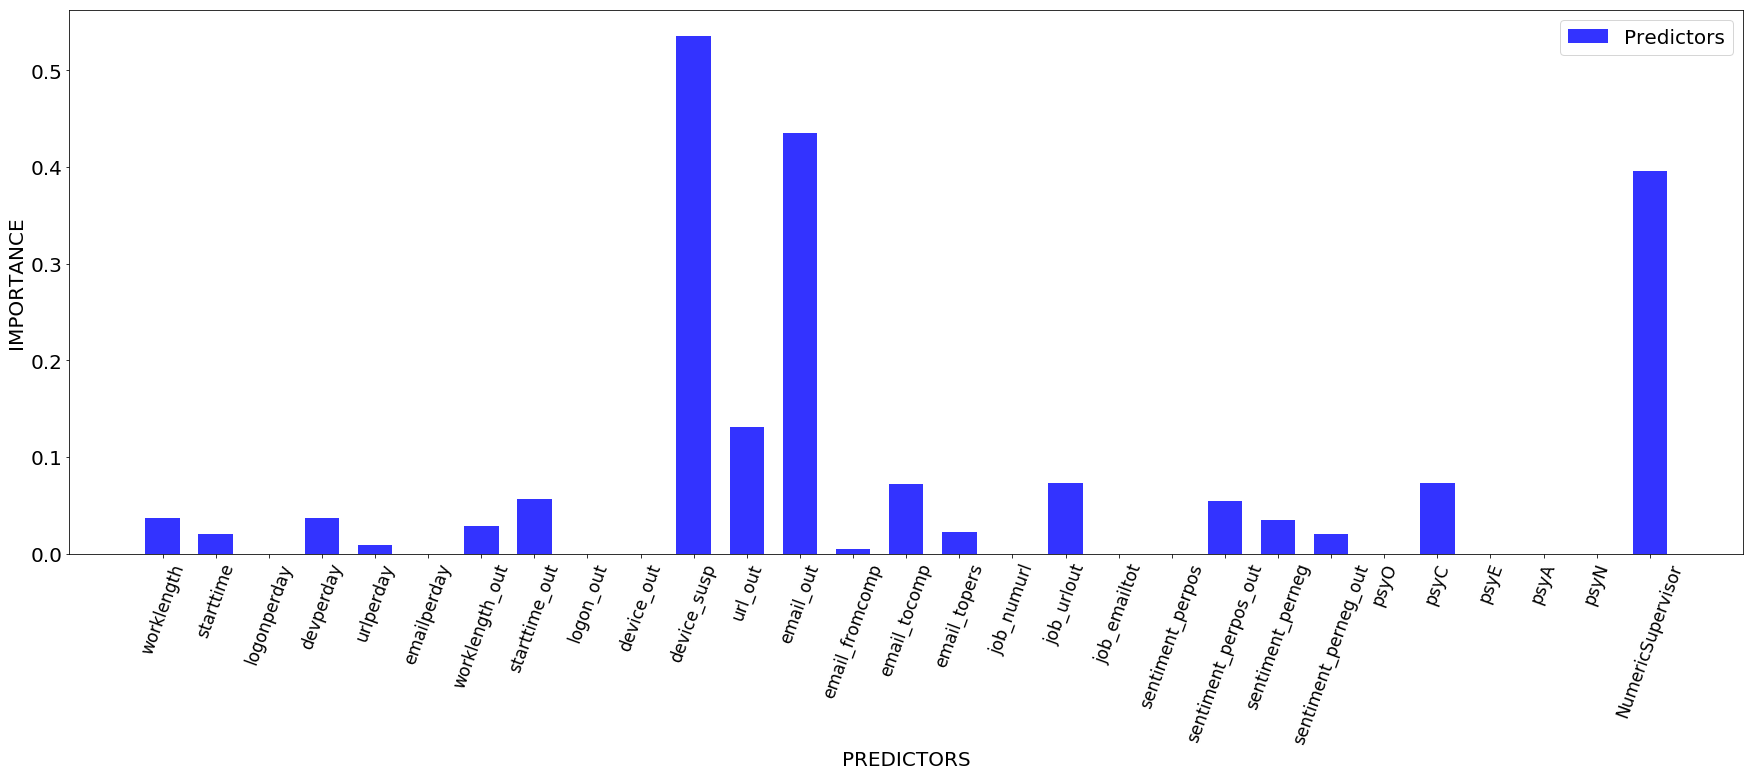

In [271]:
n_groups = 29
imp1 = var_imp3['Importance_RF']

fig, ax = plt.subplots(figsize=(30,10))
index = np.arange(n_groups)
bar_width = 0.65
opacity = 0.8
 
rects1 = plt.bar(index, imp1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Predictors')

plt.xlabel('PREDICTORS',fontsize=20)
plt.ylabel('IMPORTANCE',fontsize=20)
plt.xticks(index, var_imp3['Variables'], fontsize=17, rotation=70)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

plt.show()